In [1]:
# import important libraries
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets
from sklearn import metrics


Read the data https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

In [2]:
hc = pd.read_csv("insurance.csv")
hc['sex'] = hc['sex'].str.capitalize()
hc['smoker'] = hc['smoker'].apply(lambda x: 'Smoker' if x=='yes' else 'Non-Smoker')
hc['region'] = hc['region'].str.capitalize()

# check the content of this dataset
hc

,age,sex,bmi,children,smoker,region,charges
0,19,Female,27.900,0,Smoker,Southwest,16884.92400
1,18,Male,33.770,1,Non-Smoker,Southeast,1725.55230
2,28,Male,33.000,3,Non-Smoker,Southeast,4449.46200
3,33,Male,22.705,0,Non-Smoker,Northwest,21984.47061
4,32,Male,28.880,0,Non-Smoker,Northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,Male,30.970,3,Non-Smoker,Northwest,10600.54830
1334,18,Female,31.920,0,Non-Smoker,Northeast,2205.98080
1335,18,Female,36.850,0,Non-Smoker,Southeast,1629.83350
1336,21,Female,25.800,0,Non-Smoker,Southwest,2007.94500


In [3]:
# check for missing value
hc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Chapter 2 - Dataset General Analysis

2.3.1 show descriptive analysis for this dataset


In [4]:
# neumercial values
hc.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


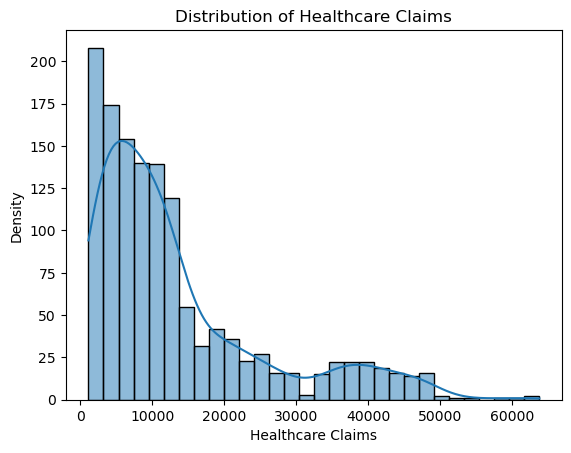

In [5]:
sns.histplot(data=hc, x='charges', bins=30, kde=True)
plt.xlabel('Healthcare Claims')
plt.ylabel('Density')
plt.title('Distribution of Healthcare Claims')
plt.show()

In [6]:
# because above only show neumerical values, we do a category analysis here

cat=hc.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=hc[i].value_counts()
    avg_claim=hc.groupby(i)["charges"].mean()
    #change the category dispaly
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
Male,676,"$13,956.75"
Female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
Non-Smoker,1064,"$8,434.27"
Smoker,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
Southeast,364,"$14,735.41"
Northwest,325,"$12,417.58"
Southwest,325,"$12,346.94"
Northeast,324,"$13,406.38"


2.3.2 Correlation Between Factors -Heatmap

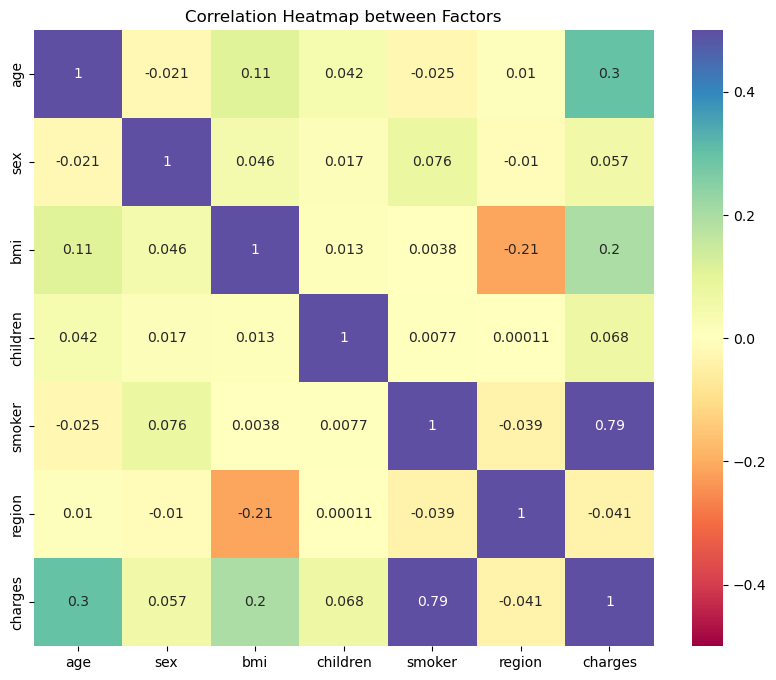

In [7]:
# add this to help below heatmap show correlation between category value
hc['sex'] = hc['sex'].map({'Male': 1, 'Female': 0})
hc['smoker'] = hc['smoker'].map({'Smoker': 1, 'Non-Smoker': 0})
hc['region'] = hc['region'].map({'Southeast': 0, 'Northwest': 1, 'Southwest': 2, 'Northeast': 3})

# computr the correlation
corr = hc.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Spectral", vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between Factors')
plt.show()

2.3.3 Grouped Analysis with Healthcare Claims

Healthcare Charges and Children Number

In [8]:
children_counts = hc['children'].value_counts().sort_index()

print(children_counts)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


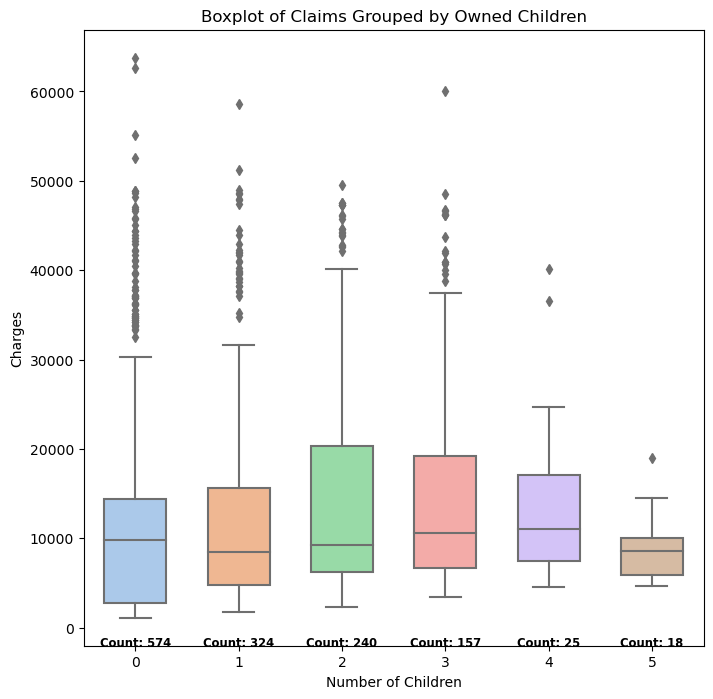

In [9]:
plt.figure(figsize=(8, 8)) 

sns.boxplot(x='children', y='charges', data=hc, width=0.6, palette='pastel')

# count the people number with children they have
counts = hc['children'].value_counts().sort_index()
for i, count in enumerate(counts):
     plt.text(i, hc['charges'].min() - (0.05 * hc['charges'].max()), f'Count: {count}', horizontalalignment='center', size='small', color='black', weight='semibold')
    


plt.title('Boxplot of Claims Grouped by Owned Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

Healthcare Charges and Age

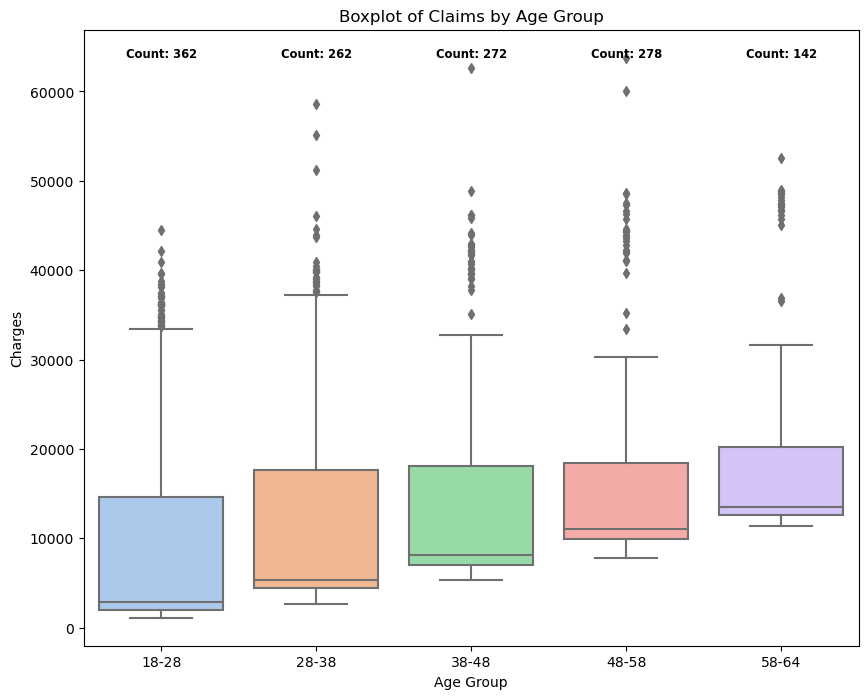

In [10]:
bins = [18, 28, 38, 48, 58, 64]
labels = ['18-28', '28-38', '38-48','48-58','58-64']
hc['Age Group'] = pd.cut(hc['age'], bins=bins, labels=labels, right=False)

# Create a boxplot of charges by age group
plt.figure(figsize=(10,8))
box_plot = sns.boxplot(x='Age Group', y='charges', data=hc, palette="pastel", order=labels)

# Add count of people numbers on top of the boxplot
age_group_counts = hc['Age Group'].value_counts().sort_index()
for i, age_group in enumerate(labels):
    box_plot.text(i, hc['charges'].max(), f'Count: {age_group_counts[age_group]}', 
                  horizontalalignment='center', size='small', color='black', weight='semibold')

plt.title('Boxplot of Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.show()

Healthcare Charges and BMI

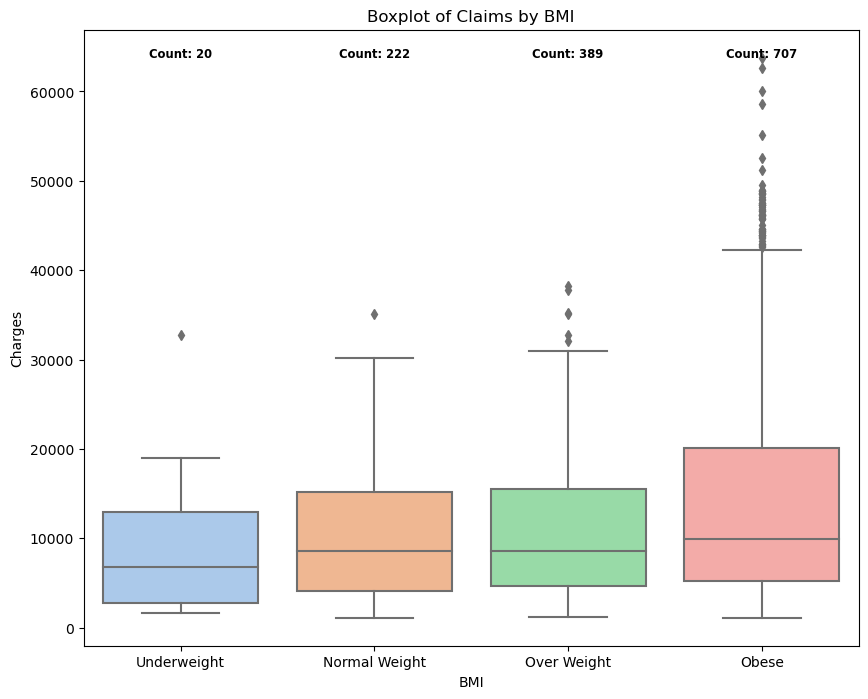

In [11]:
bins = [15.9, 18.5, 24.9, 30, 53.2]
labels = ['Underweight', 'Normal Weight', 'Over Weight','Obese']
hc['BMI'] = pd.cut(hc['bmi'], bins=bins, labels=labels, right=False)

# Create a boxplot of charges by BMI
plt.figure(figsize=(10,8))
box_plot = sns.boxplot(x='BMI', y='charges', data=hc, palette="pastel", order=labels)

# Add count of people numbers on top of the boxplot
age_group_counts = hc['BMI'].value_counts().sort_index()
for i, age_group in enumerate(labels):
    box_plot.text(i, hc['charges'].max(), f'Count: {age_group_counts[age_group]}', 
                  horizontalalignment='center', size='small', color='black', weight='semibold')

plt.title('Boxplot of Claims by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Chapter 3 - Unsupervised Analysis

In [12]:
from sklearn import cluster
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [13]:
hc = pd.read_csv("insurance.csv")
hc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
hc = hc[['smoker', 'age', 'sex', 'bmi', 'children','region',"charges"]]

In [15]:
#change the description to neumerical

hc['sex'] = hc['sex'].map({'male': 1, 'female': 0})
hc['smoker'] = hc['smoker'].map({'yes': 1, 'no': 0})
hc['region'] = hc['region'].map({'southeast': 0, 'northwest': 1, 'southwest': 2, 'northeast': 3})

# check the content of this dataset
hc

,smoker,age,sex,bmi,children,region,charges
0,1,19,0,27.900,0,2,16884.92400
1,0,18,1,33.770,1,0,1725.55230
2,0,28,1,33.000,3,0,4449.46200
3,0,33,1,22.705,0,1,21984.47061
4,0,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0,50,1,30.970,3,1,10600.54830
1334,0,18,0,31.920,0,3,2205.98080
1335,0,18,0,36.850,0,0,1629.83350
1336,0,21,0,25.800,0,2,2007.94500


In [16]:
hc.values

array([[1.00000000e+00, 1.90000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+00, 1.68849240e+04],
       [0.00000000e+00, 1.80000000e+01, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.72555230e+03],
       [0.00000000e+00, 2.80000000e+01, 1.00000000e+00, ...,
        3.00000000e+00, 0.00000000e+00, 4.44946200e+03],
       ...,
       [0.00000000e+00, 1.80000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.62983350e+03],
       [0.00000000e+00, 2.10000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+00, 2.00794500e+03],
       [1.00000000e+00, 6.10000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.91413603e+04]])

In [17]:
X = hc.values[:, 1:7] 
Y = hc.values[:,0] #0 is for the index of the first column

In [18]:
print(X)
print("---------------------------------")
print(Y)

[[1.90000000e+01 0.00000000e+00 2.79000000e+01 0.00000000e+00
  2.00000000e+00 1.68849240e+04]
 [1.80000000e+01 1.00000000e+00 3.37700000e+01 1.00000000e+00
  0.00000000e+00 1.72555230e+03]
 [2.80000000e+01 1.00000000e+00 3.30000000e+01 3.00000000e+00
  0.00000000e+00 4.44946200e+03]
 ...
 [1.80000000e+01 0.00000000e+00 3.68500000e+01 0.00000000e+00
  0.00000000e+00 1.62983350e+03]
 [2.10000000e+01 0.00000000e+00 2.58000000e+01 0.00000000e+00
  2.00000000e+00 2.00794500e+03]
 [6.10000000e+01 0.00000000e+00 2.90700000e+01 0.00000000e+00
  1.00000000e+00 2.91413603e+04]]
---------------------------------
[1. 0. 0. ... 0. 0. 1.]


In [19]:
print(np.unique(Y))

[0. 1.]


In [20]:
hc['smoker'] = pd.to_numeric(hc['smoker'], errors='coerce')
hc.dtypes

smoker        int64
age           int64
sex           int64
bmi         float64
children      int64
region        int64
charges     float64
dtype: object

In [21]:
# Scale the data that we are going to use for clustering
from sklearn.preprocessing import scale

In [22]:
mean = np.array([0.204783, 39.207025, 0.505232, 30.663397, 1.094918, 1.455157, 13270.422265])
std = np.array([0.403694, 14.049960, 0.500160, 6.098187, 1.205493, 1.130197, 12110.011237])
arr1 = (hc - mean) / std

print(arr1, end="\n------------------------\n")
print("Before scaling, mean:",arr1.mean(axis=0))
print("Before scaling, std:",arr1.std(axis=0))


        smoker       age       sex       bmi  children    region   charges
0     1.969851 -1.438227 -1.010141 -0.453151 -0.908274  0.482078  0.298472
1    -0.507273 -1.509401  0.989219  0.509431 -0.078738 -1.287525 -0.953333
2    -0.507273 -0.797655  0.989219  0.383164  1.580334 -1.287525 -0.728402
3    -0.507273 -0.441782  0.989219 -1.305043 -0.908274 -0.402724  0.719574
4    -0.507273 -0.512957  0.989219 -0.292447 -0.908274 -0.402724 -0.776512
...        ...       ...       ...       ...       ...       ...       ...
1333 -0.507273  0.768185  0.989219  0.050278  1.580334 -0.402724 -0.220468
1334 -0.507273 -1.509401 -1.010141  0.206062 -0.908274  1.366879 -0.913661
1335 -0.507273 -1.509401 -1.010141  1.014499 -0.908274 -1.287525 -0.961237
1336 -0.507273 -1.295877 -1.010141 -0.797515 -0.908274  0.482078 -0.930014
1337  1.969851  1.551106 -1.010141 -0.261290 -0.908274 -0.402724  1.310563

[1338 rows x 7 columns]
------------------------
Before scaling, mean: smoker      6.405716e-07
age

In [23]:
scaled_arr1 = scale(arr1)
print(scaled_arr1, end="\n------------------------\n")
print("After scaling, mean:",scaled_arr1.mean(axis=0))
print("After scaling, std:",scaled_arr1.std(axis=0))

[[ 1.97058663 -1.43876426 -1.0105187  ... -0.90861367  0.48225837
   0.2985838 ]
 [-0.5074631  -1.50996545  0.98959079 ... -0.07876719 -1.28800691
  -0.95368917]
 [-0.5074631  -0.79795355  0.98959079 ...  1.58092576 -1.28800691
  -0.72867467]
 ...
 [-0.5074631  -1.50996545 -1.0105187  ... -0.90861367 -1.28800691
  -0.96159623]
 [-0.5074631  -1.29636188 -1.0105187  ... -0.90861367  0.48225837
  -0.93036151]
 [ 1.97058663  1.55168573 -1.0105187  ... -0.90861367 -0.40287427
   1.31105347]]
------------------------
After scaling, mean: [-9.82439508e-17 -4.77943544e-17 -1.23468749e-16  1.59314515e-17
  3.18629029e-17 -7.83296364e-17 -3.05352820e-17]
After scaling, std: [1. 1. 1. 1. 1. 1. 1.]


In [24]:
print("Before scaling, mean:",arr1.mean(axis=0))
print("After scaling, mean:",scaled_arr1.mean(axis=0))
print("Before scaling, std:",arr1.std(axis=0))
print("After scaling, std:",scaled_arr1.std(axis=0))

Before scaling, mean: smoker      6.405716e-07
age         2.925711e-08
sex        -6.216247e-07
bmi        -2.279587e-08
children   -1.760749e-07
region     -4.364492e-08
charges     1.166442e-11
dtype: float64
After scaling, mean: [-9.82439508e-17 -4.77943544e-17 -1.23468749e-16  1.59314515e-17
  3.18629029e-17 -7.83296364e-17 -3.05352820e-17]
Before scaling, std: smoker      1.000000
age         1.000000
sex         0.999999
bmi         1.000000
children    1.000000
region      1.000000
charges     1.000000
dtype: float64
After scaling, std: [1. 1. 1. 1. 1. 1. 1.]


In [25]:
scaled_data = scale(X)
scaled_data

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  0.48225837,
         0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -1.28800691,
        -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -1.28800691,
        -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -1.28800691,
        -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367,  0.48225837,
        -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367, -0.40287427,
         1.31105347]])

In [26]:
X = np.array(X,dtype=np.float64)

#print the number and round it to 3 demicals
print("scaled_data")
print("mean=",np.around(scaled_data.mean(axis=0), decimals=3))
print("std=",np.around(scaled_data.std(axis=0), decimals=3))
print("min=",np.around(scaled_data.min(axis=0), decimals=3))
print("max=",np.around(scaled_data.max(axis=0), decimals=3))
print("Not scaled_data")
print("mean=", [f"{value:.3f}" for value in np.around(X.mean(axis=0), decimals=3)])
print("std=", [f"{value:.3f}" for value in np.around(X.std(axis=0), decimals=3)])
print("min=", [f"{value:.3f}" for value in np.around(X.min(axis=0), decimals=3)])
print("max=", [f"{value:.3f}" for value in np.around(X.max(axis=0), decimals=3)])

scaled_data
mean= [-0. -0. -0. -0. -0. -0.]
std= [1. 1. 1. 1. 1. 1.]
min= [-1.51  -1.011 -2.412 -0.909 -1.288 -1.004]
max= [1.765 0.99  3.686 3.241 1.367 4.172]
Not scaled_data
mean= ['39.207', '0.505', '30.663', '1.095', '1.455', '13270.422']
std= ['14.045', '0.500', '6.096', '1.205', '1.130', '12105.485']
min= ['18.000', '0.000', '15.960', '0.000', '0.000', '1121.874']
max= ['64.000', '1.000', '53.130', '5.000', '3.000', '63770.428']


In [27]:
# We know that there are 3 possible categories for the data. 
# Create 3 data clusters using Agglomerative Hierarchical Clustering. 
# What are the silhouette score, homogeneity and completeness for these clusters? 
# (Helping hand, if you need to convert labels from strings to something else look at sklearn.preprocessing.LabelEncoder())

#from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
Y2 = LabelEncoder().fit_transform(Y)

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))

model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine")
model.fit(scaled_data)

#Silhouette refers to a method of interpretation and validation of consistency within clusters of data
print("silhouette_score = ", metrics.silhouette_score(scaled_data, model.labels_))

#all of the data points that we have of the same class are elements of the same cluster
print("completeness_score = ", metrics.completeness_score(Y2, model.labels_))
# all of the clusters contain only data points, which are members of a single class
print("homogeneity_score = ", metrics.homogeneity_score(Y2, model.labels_))

silhouette_score =  0.1682743940980565
completeness_score =  0.03668366000647319
homogeneity_score =  0.049824325685551056


In [28]:
print(Y)
print(Y2)
print(model.labels_)

[1. 0. 0. ... 0. 0. 1.]
[1 0 0 ... 0 0 1]
[1 0 0 ... 1 1 1]


## 3.1 Agglomerative Clustering

In [29]:
# What are the impact of different distance and affinity measures on the silhouette score, homogeneity and 
# completeness for these clusters 
# (options available at http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)? 
# What is the best combination?

#from sklearn import cluster
#from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
# aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
aff = ["euclidean", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            print(a,l)
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_data)
            print("silhouette_score = ", metrics.silhouette_score(scaled_data, model.labels_))
            print("completeness_score = ", metrics.completeness_score(Y2, model.labels_))
            print("homogeneity_score = ", metrics.homogeneity_score(Y2, model.labels_))

euclidean ward
silhouette_score =  0.13331432568170593
completeness_score =  0.09086411755079771
homogeneity_score =  0.11759220192382794
euclidean complete
silhouette_score =  0.1086190219992651
completeness_score =  0.023076097091802486
homogeneity_score =  0.027706838607588314
euclidean average
silhouette_score =  0.19285860678582328
completeness_score =  0.035866130808252294
homogeneity_score =  0.0020319737380009727
manhattan complete
silhouette_score =  0.11371835460947934
completeness_score =  0.06580372482394248
homogeneity_score =  0.08987986869589126
manhattan average
silhouette_score =  0.22728074291661018
completeness_score =  0.4945827990190574
homogeneity_score =  0.3657923452547214
cosine complete
silhouette_score =  0.17351340146094027
completeness_score =  4.852045022530822e-06
homogeneity_score =  6.62927033389056e-06
cosine average
silhouette_score =  0.1682743940980565
completeness_score =  0.03668366000647319
homogeneity_score =  0.049824325685551056


[0.11759220192382794, 0.027706838607588314, 0.0020319737380009727, 0.08987986869589126, 0.3657923452547214, 6.62927033389056e-06, 0.049824325685551056]


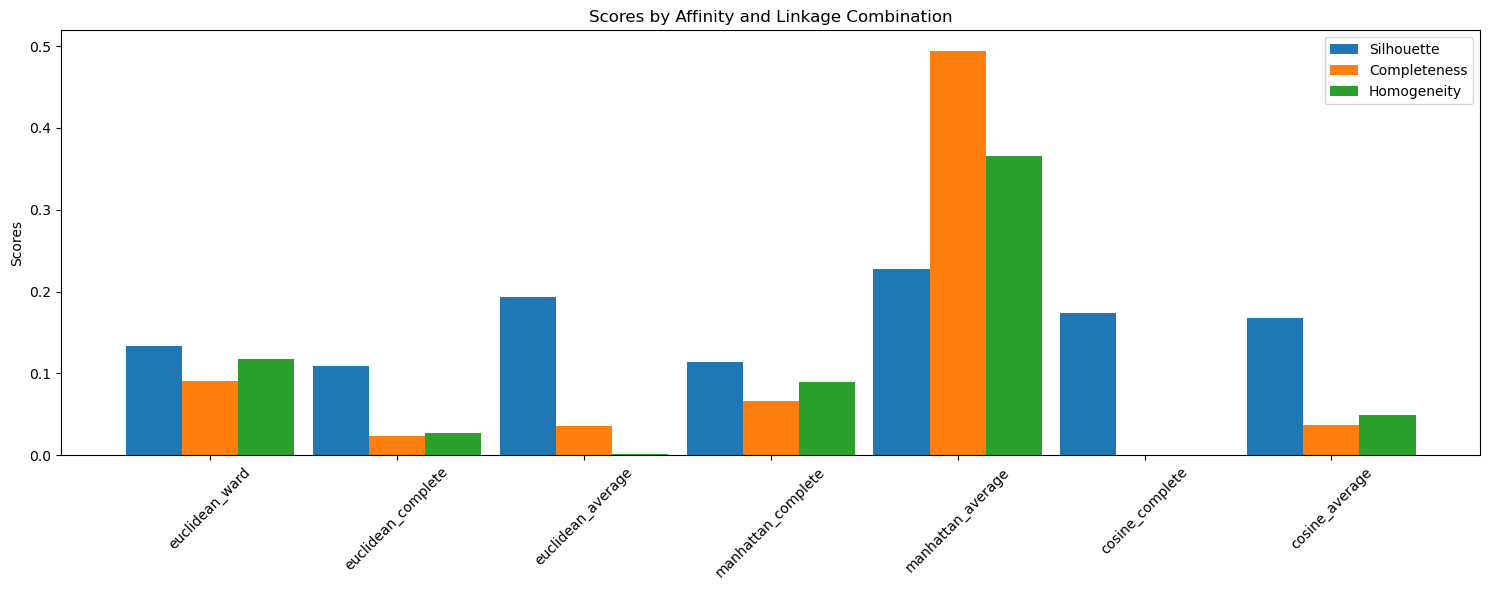

In [30]:
import matplotlib.pyplot as plt
import numpy as np


results = []

for a in aff:
    for l in link:
        if l == "ward" and a != "euclidean":
            continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_data)
            
            silhouette = metrics.silhouette_score(scaled_data, model.labels_)
            completeness = metrics.completeness_score(Y2, model.labels_)
            homogeneity = metrics.homogeneity_score(Y2, model.labels_)
            
            results.append({
                'affinity_linkage': f"{a}_{l}",
                'silhouette': silhouette,
                'completeness': completeness,
                'homogeneity': homogeneity
            })

labels = [entry['affinity_linkage'] for entry in results]
silhouette_scores = [entry['silhouette'] for entry in results]
completeness_scores = [entry['completeness'] for entry in results]
homogeneity_scores = [entry['homogeneity'] for entry in results]

x = np.arange(len(labels))  
width = 0.3  # wedth of bar

fig, ax = plt.subplots(figsize=(15, 6))

#
rects1 = ax.bar(x - width, silhouette_scores, width, label='Silhouette')
rects2 = ax.bar(x, completeness_scores, width, label='Completeness')
rects3 = ax.bar(x + width, homogeneity_scores, width, label='Homogeneity')


ax.set_ylabel('Scores')
ax.set_title('Scores by Affinity and Linkage Combination')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # reverse x for better reading
ax.legend()

fig.tight_layout()
print(homogeneity_scores)
plt.show()

In [31]:
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
# aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
aff = ["euclidean", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
result = []
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_data)
            result.append([a,l,metrics.silhouette_score(scaled_data, model.labels_),metrics.completeness_score(Y2, model.labels_),metrics.homogeneity_score(Y2, model.labels_)])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  print(result[i])
  if(result[i][2]>maxV):
    maxV = result[i][2]
    maxI = i
print("Max silhouette_score: ", result[maxI])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][3]>maxV):
    maxV = result[i][3]
    maxI = i
print("Max completeness_score: ", result[maxI])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][4]>maxV):
    maxV = result[i][4]
    maxI = i
print("Max homogeneity_score: ", result[maxI])

['euclidean', 'ward', 0.13331432568170593, 0.09086411755079771, 0.11759220192382794]
['euclidean', 'complete', 0.1086190219992651, 0.023076097091802486, 0.027706838607588314]
['euclidean', 'average', 0.19285860678582328, 0.035866130808252294, 0.0020319737380009727]
['manhattan', 'complete', 0.11371835460947934, 0.06580372482394248, 0.08987986869589126]
['manhattan', 'average', 0.22728074291661018, 0.4945827990190574, 0.3657923452547214]
['cosine', 'complete', 0.17351340146094027, 4.852045022530822e-06, 6.62927033389056e-06]
['cosine', 'average', 0.1682743940980565, 0.03668366000647319, 0.049824325685551056]
Max silhouette_score:  ['manhattan', 'average', 0.22728074291661018, 0.4945827990190574, 0.3657923452547214]
Max completeness_score:  ['manhattan', 'average', 0.22728074291661018, 0.4945827990190574, 0.3657923452547214]
Max homogeneity_score:  ['manhattan', 'average', 0.22728074291661018, 0.4945827990190574, 0.3657923452547214]


In [32]:
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
# aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
aff = ["euclidean", "manhattan", "cosine"]
link = ["ward", "complete", "average"]
result = []
for a in aff:
    for l in link:
      for i in range(2,10):
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=i, linkage=l, affinity=a)
            model.fit(scaled_data)
            result.append([a,l,i,metrics.silhouette_score(scaled_data, model.labels_),metrics.completeness_score(Y2, model.labels_),metrics.homogeneity_score(Y2, model.labels_)])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][3]>maxV):
    maxV = result[i][3]
    maxI = i
print("Max silhouette_score: ", result[maxI])

Max silhouette_score:  ['manhattan', 'average', 2, 0.22728074291661018, 0.4945827990190574, 0.3657923452547214]


In [33]:
# What are the silhouette score, homogeneity and completeness for different numbers of clusters created using KMeans?
#from sklearn import cluster
#from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 5):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    print(k)
    print("silhouette_score = ", metrics.silhouette_score(scaled_data, kmeans.labels_))
    print("completeness_score = ", metrics.completeness_score(Y2, kmeans.labels_))
    print("homogeneity_score = ", metrics.homogeneity_score(Y2, kmeans.labels_))

2
silhouette_score =  0.18290406220871755
completeness_score =  0.004203267750293556
homogeneity_score =  0.005746488051007477
3
silhouette_score =  0.20060280841373643
completeness_score =  0.16919672378369469
homogeneity_score =  0.3298015975820634
4
silhouette_score =  0.1849135458090942
completeness_score =  0.12429164843788086
homogeneity_score =  0.3238930829620092


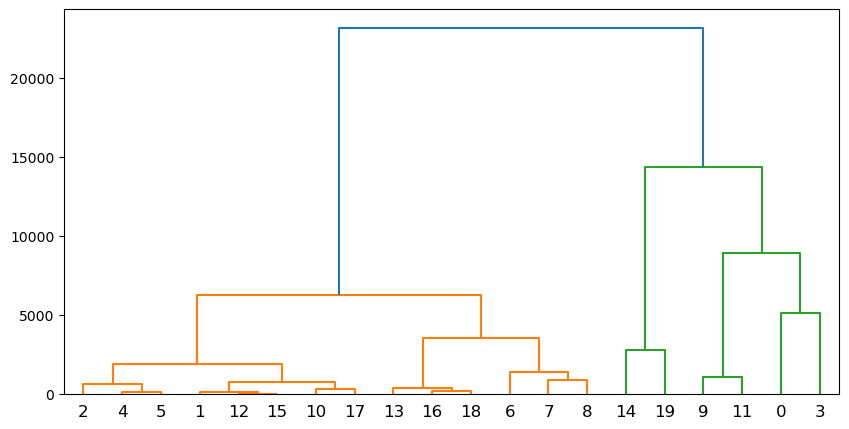

In [34]:
# dendrogram
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
Z = hierarchy.linkage(X[0:20], method='average', metric='cityblock')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)
plt.show()

# Chapter 4 - Supervised Analysis

## LinearRegression

In [35]:
# Standard imports and assertions to ensure we have the right versions of Python etc. 
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd

In [36]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
hc = pd.read_csv("insurance.csv")


In [38]:
hc['sex'] = hc['sex'].map({'male': 1, 'female': 0})
hc['smoker'] = hc['smoker'].map({'yes': 1, 'no': 0})
hc['region'] = hc['region'].map({'southeast': 0, 'northwest': 1, 'southwest': 2, 'northeast': 3})
hc.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


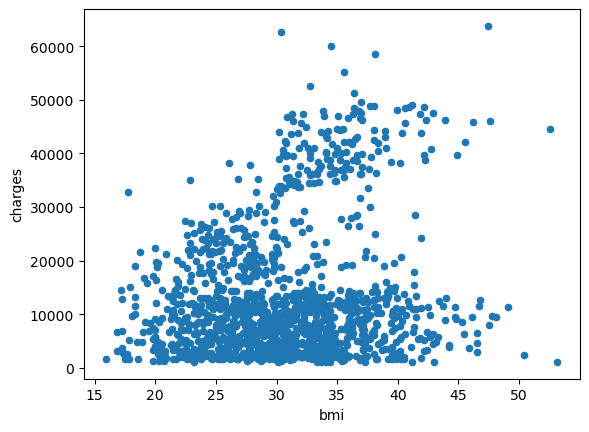

In [39]:
hc.plot(kind='scatter', x="bmi", y='charges')

plt.show()

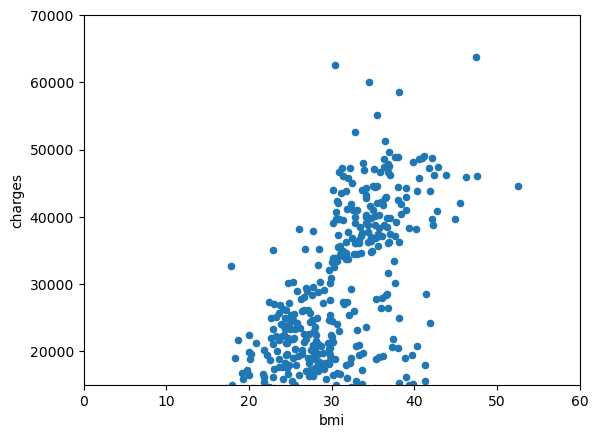

In [40]:
hc.plot(kind='scatter', x='bmi', y='charges')
plt.axis([0, 60, 15000, 70000])
plt.show()

In [41]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X_train = np.c_[hc["bmi"]]
y_train = np.c_[hc["charges"]]
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [42]:
model.score(X_train,y_train)

0.03933913991786253

In [43]:
model.coef_

array([[393.8730308]])

In [44]:
model.intercept_

array([1192.93720896])

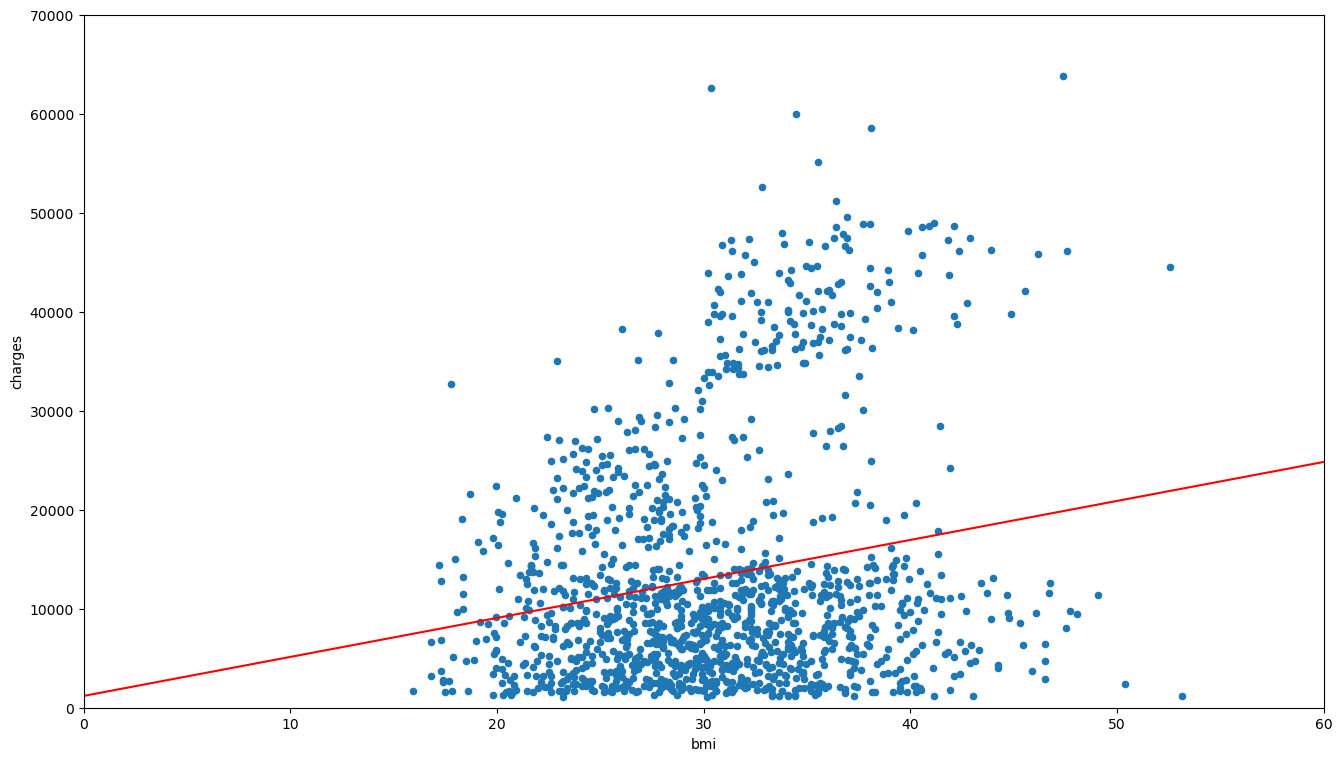

In [45]:
t0 = model.intercept_
t1 = model.coef_[0]
hc.plot(kind='scatter', x="bmi", y='charges', figsize=(16,9))
plt.axis([0, 60, 0, 70000])

X_plot = np.linspace(0, 60, 1000)
plt.plot(X_plot, t0 + t1 * X_plot, "r")
plt.show()

In [46]:
# Make a prediction with bmi
X_new = [[54]]  # healthcare claims with bmi 
print(model.predict(X_new))

[[22462.08087202]]


In [47]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
y_true = y_train
y_pred = model.predict(X_train)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R²:", r2)

Mean Absolute Error: 9172.351145507562
Mean Squared Error: 140777900.09850758
R²: 0.03933913991786253


## LogisticRegression

In [57]:
import sklearn
from sklearn import datasets
from sklearn import metrics

In [58]:
hc = pd.read_csv("insurance.csv")
hc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
bins = [1121, 4740.29, 9382.03, 16639.91, 30000, 45000, 63771]  # The quartile is used and two additional dividing points are added in the high value range
labels = [1, 2, 3, 4, 5, 6]
hc['Charge Group'] = pd.cut(hc['charges'], bins=bins, labels=labels, right=False)

In [60]:
hc = hc[["Charge Group", 'age', 'sex', 'bmi', 'children','region','smoker']]

In [61]:
#change the description to neumerical

hc['sex'] = hc['sex'].map({'male': 1, 'female': 0})
hc['smoker'] = hc['smoker'].map({'yes': 1, 'no': 0})
hc['region'] = hc['region'].map({'southeast': 0, 'northwest': 1, 'southwest': 2, 'northeast': 3})

# check the content of this dataset
hc

,Charge Group,age,sex,bmi,children,region,smoker
0,4,19,0,27.900,0,2,1
1,1,18,1,33.770,1,0,0
2,1,28,1,33.000,3,0,0
3,4,33,1,22.705,0,1,0
4,1,32,1,28.880,0,1,0
...,...,...,...,...,...,...,...
1333,3,50,1,30.970,3,1,0
1334,1,18,0,31.920,0,3,0
1335,1,18,0,36.850,0,0,0
1336,1,21,0,25.800,0,2,0


In [62]:
hcData = hc.values[:, 1:7]
hcTarget = hc.values[:,0] # we know that the true target is in the first column for this dataset

In [63]:
print(hcData)
print(hcTarget)

[[19.    0.   27.9   0.    2.    1.  ]
 [18.    1.   33.77  1.    0.    0.  ]
 [28.    1.   33.    3.    0.    0.  ]
 ...
 [18.    0.   36.85  0.    0.    0.  ]
 [21.    0.   25.8   0.    2.    0.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[4. 1. 1. ... 1. 1. 4.]


In [64]:
from sklearn.model_selection import train_test_split

# split the dataset into two subsets: training and test set
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(hcData, hcTarget, test_size = 0.3)

# X_train, X_test, Y_train, Y_test
print(X_train)
#print(X_test)
print(Y_train)
#print(Y_test)

[[40.     0.    36.19   0.     0.     0.   ]
 [37.     1.    46.53   3.     0.     0.   ]
 [53.     0.    37.43   1.     1.     0.   ]
 ...
 [64.     1.    34.5    0.     2.     0.   ]
 [28.     1.    35.435  0.     3.     0.   ]
 [55.     0.    35.2    0.     0.     1.   ]]
[2. 2. 3. 3. 3. 5. 1. 1. 3. 1. 1. 4. 1. 1. 3. 4. 2. 4. 5. 5. 5. 2. 1. 3.
 1. 5. 2. 3. 1. 2. 2. 1. 3. 2. 3. 4. 4. 1. 1. 1. 2. 1. 3. 4. 2. 1. 4. 1.
 1. 4. 6. 5. 2. 4. 2. 1. 4. 2. 1. 2. 3. 3. 2. 3. 3. 3. 5. 2. 1. 4. 3. 3.
 1. 1. 2. 2. 2. 2. 1. 5. 2. 4. 5. 3. 2. 1. 4. 1. 4. 2. 1. 5. 3. 4. 3. 2.
 1. 2. 3. 1. 4. 2. 3. 1. 1. 2. 1. 1. 4. 2. 3. 2. 6. 1. 3. 2. 4. 4. 3. 1.
 5. 1. 5. 2. 3. 4. 4. 5. 1. 6. 3. 5. 5. 3. 3. 4. 1. 1. 3. 1. 2. 3. 4. 2.
 1. 3. 3. 1. 2. 3. 6. 1. 4. 4. 1. 4. 4. 1. 1. 5. 3. 5. 1. 2. 5. 5. 1. 2.
 5. 2. 3. 3. 1. 1. 2. 2. 2. 2. 4. 2. 3. 1. 2. 1. 1. 3. 1. 5. 3. 4. 3. 3.
 2. 3. 2. 3. 3. 1. 2. 5. 3. 1. 2. 5. 1. 4. 3. 2. 2. 1. 1. 4. 2. 1. 6. 2.
 3. 1. 5. 2. 1. 3. 2. 3. 1. 5. 5. 1. 4. 3. 1. 2. 4. 1. 1. 3. 4. 3. 

In [65]:
# i. Logistic regression
print("LOGISTIC REGRESSION")
print("**************************************")
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, Y_train)
predicted = lm.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))

LOGISTIC REGRESSION
**************************************
              precision    recall  f1-score   support

         1.0       0.84      0.80      0.82       106
         2.0       0.64      0.70      0.67       104
         3.0       0.71      0.75      0.73       102
         4.0       0.50      0.43      0.46        47
         5.0       0.46      0.62      0.53        29
         6.0       0.00      0.00      0.00        14

    accuracy                           0.68       402
   macro avg       0.53      0.55      0.53       402
weighted avg       0.66      0.68      0.67       402

[[85 21  0  0  0  0]
 [ 6 73 25  0  0  0]
 [ 4 14 76  5  3  0]
 [ 5  6  4 20 11  1]
 [ 1  0  2  8 18  0]
 [ 0  0  0  7  7  0]]


In [67]:
# K nearest neighbours
print("\n\n K nearest neighbours")
print("**************************************")
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))



 K nearest neighbours
**************************************
KNeighborsClassifier()
              precision    recall  f1-score   support

         1.0       0.67      0.94      0.78       106
         2.0       0.66      0.81      0.73       104
         3.0       0.72      0.75      0.74       102
         4.0       0.46      0.13      0.20        47
         5.0       0.60      0.10      0.18        29
         6.0       0.00      0.00      0.00        14

    accuracy                           0.67       402
   macro avg       0.52      0.46      0.44       402
weighted avg       0.63      0.67      0.62       402

[[100   4   0   2   0   0]
 [ 13  84   4   1   2   0]
 [ 11  10  77   4   0   0]
 [ 14  18   9   6   0   0]
 [ 12   9   5   0   3   0]
 [  0   2  12   0   0   0]]


In [69]:
# Decision tree
print("\nDecision Tree")
print("**************************************")
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
#model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))


Decision Tree
**************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

         1.0       0.87      0.85      0.86       106
         2.0       0.91      0.83      0.86       104
         3.0       0.79      0.81      0.80       102
         4.0       0.55      0.62      0.58        47
         5.0       0.71      0.83      0.76        29
         6.0       0.73      0.57      0.64        14

    accuracy                           0.80       402
   macro avg       0.76      0.75      0.75       402
weighted avg       0.80      0.80      0.80       402

[[90  1  3 12  0  0]
 [ 3 86  8  7  0  0]
 [ 5  6 83  5  3  0]
 [ 6  2  9 29  1  0]
 [ 0  0  2  0 24  3]
 [ 0  0  0  0  6  8]]


In [70]:
#Naive Bayes
print("\nNaive Bayes")
print("**************************************")
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
predicted = model.predict(X_test)
print(metrics.classification_report(Y_test, predicted))
print(metrics.confusion_matrix(Y_test, predicted))


Naive Bayes
**************************************
GaussianNB()
              precision    recall  f1-score   support

         1.0       0.89      0.93      0.91       106
         2.0       0.51      1.00      0.67       104
         3.0       1.00      0.05      0.09       102
         4.0       0.53      0.17      0.26        47
         5.0       0.40      0.07      0.12        29
         6.0       0.23      1.00      0.37        14

    accuracy                           0.58       402
   macro avg       0.59      0.54      0.40       402
weighted avg       0.72      0.58      0.49       402

[[ 99   7   0   0   0   0]
 [  0 104   0   0   0   0]
 [  5  84   5   7   1   0]
 [  7   8   0   8   2  22]
 [  0   2   0   0   2  25]
 [  0   0   0   0   0  14]]


In [72]:
# once we have created the models, we can try to predict new cases using the models created
# 'age', 'sex', 'bmi', 'children','region','smoker'
# male: 1, female: 0
# smoker': 1, non-smoker: 0
# southeast: 0, northwest: 1, southwest: 2, northeast: 3

newCases = [[27,0,28.5,0,3,0],[33,1,22,0,1,1]]
predictedNewCases = model.predict(newCases)
print(predictedNewCases)

[1. 4.]


In [73]:
newCases = [[27,0,28.5,0,3,0], [33,1,22,0,1,1]]
Y_newCases = [1,4]
predictedNewCases = model.predict(newCases)
print(metrics.classification_report(Y_newCases, predictedNewCases))
print(metrics.confusion_matrix(Y_newCases, predictedNewCases))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]


# Appendix

In [75]:
import sys
print(sys.version)


3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
